In [1]:
from  selenium import webdriver 
from bs4 import BeautifulSoup as bs
import re 
import string
from time import  sleep
from selenium.common.exceptions import TimeoutException
import pickle
from collections import deque
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as  np
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import seaborn as sns

import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
with open("./vilas_state.pkl",'rb') as file:
        vilas,stack2,link2=pickle.load(file)
df_vilas=pd.DataFrame(vilas)
df_vilas.rename(columns={'data': 'date'},inplace=True, errors='raise')
df_vilas.drop(['vlaues'],axis=1,inplace=True)
df_vilas.drop(df_vilas.loc[[type(v)!=str for v in df_vilas['date']]].index,inplace=True)
df_vilas['cat']='Sell'
len(vilas)

21737

In [3]:
with open("./vlias-for-rent.pkl",'rb') as file:
        vilas_rent,stack2,link2=pickle.load(file)
df_vilas_rent=pd.DataFrame(vilas_rent)
df_vilas_rent.rename(columns={'data': 'date'},inplace=True, errors='raise')
df_vilas_rent.drop([i  for i in list(df_vilas_rent.columns) if i not in list(df_vilas.columns)],inplace=True,axis=1)
df_vilas_rent['cat']='Rent'
len(vilas_rent)

5142

In [4]:
with open("./apartmant.pkl",'rb') as file:
        apartmant,stack2,link2=pickle.load(file)
df_apartmant=pd.DataFrame(apartmant)
df_apartmant.rename(columns={'data': 'date'},inplace=True, errors='raise')
df_apartmant['cat']='Sell'

len(apartmant)

20317

In [5]:
with open("./apertment-rent.pkl",'rb') as file:
        apertment_rent,stack2,link2=pickle.load(file)
df_apertment_rent=pd.DataFrame(apertment_rent)
df_apertment_rent.rename(columns={'data': 'date'},inplace=True, errors='raise')
df_apertment_rent['cat']='Rent'
len(apertment_rent)

21735

In [6]:
df=[df_apertment_rent ,df_apartmant ,df_vilas_rent,df_vilas]

In [7]:
df_apartmant['Level'].value_counts() 

[2]          4189
[3]          3396
[1]          2951
[Ground]     2761
[4]          2011
[5]          1512
[6]           771
[7]           573
[10+]         558
[9]           431
[8]           428
[10]          375
[Highest]     361
Name: Level, dtype: int64

***Cleaning***


In [8]:
df_apertment_rent[[i for i in list(df[1].columns) if i not in list(df[0].columns)]]=0
df_vilas_rent[[i for i in list(df[1].columns) if i not in list(df[3].columns)]]=0
df_vilas[[i for i in list(df[1].columns) if i not in list(df[3].columns)]]=0

In [9]:
for i in df:
    i['date']=i['date'].apply(lambda x: x.strip())
    i['date']=pd.to_datetime(i['date'], format="%d %B %Y")

In [10]:
z=list(df_vilas.columns)
x=['price','location','date','title','link','viwers','negotiable','cat']
selected=[i for i in z if i not in x ]
selected

['Bedrooms',
 'Bathrooms',
 'Area (m²)',
 'Type',
 'Payment Option',
 'Compound',
 'Delivery Term',
 'Amenities',
 'Furnished',
 'Delivery Date',
 'Down Payment',
 'Level']

In [11]:
for x in df:
    for i in selected:
        print(df_vilas[i].value_counts())
        print("*"*80)

[4]      8826
[3]      4968
[5]      4224
[6]      1798
[7]       618
[10+]     536
[8]       235
[2]       168
[10]      148
[9]       135
[1]        47
Name: Bedrooms, dtype: int64
********************************************************************************
[4]      7550
[3]      6340
[5]      3637
[6]      1537
[2]      1009
[7]       632
[10+]     410
[8]       240
[1]       153
[9]        98
[10]       97
Name: Bathrooms, dtype: int64
********************************************************************************
[300]       548
[400]       504
[600]       484
[500]       469
[260]       401
           ... 
[1,375]       1
[443]         1
[609]         1
[1,301]       1
[388.78]      1
Name: Area (m²), Length: 1078, dtype: int64
********************************************************************************
[Stand, Alone, Villa]    11528
[Town, House]             5770
[Twin, House]             4405
Name: Type, dtype: int64
****************************************************

In [12]:
def xx (z):
    try:
        return ' '.join(str(e) for e in z)
    except Exception as e:
        
        return 0
     
for x in df:
    for i in selected:
        x[i]=x[i].apply(xx)

In [13]:
for i in selected:
    print(i)
    print(df_vilas[i].value_counts())
    print("*"*80)

Bedrooms
4      8826
3      4968
5      4224
6      1798
7       618
10+     536
8       235
2       168
10      148
9       135
1        47
Name: Bedrooms, dtype: int64
********************************************************************************
Bathrooms
4      7550
3      6340
5      3637
6      1537
2      1009
7       632
10+     410
8       240
1       153
9        98
10       97
Name: Bathrooms, dtype: int64
********************************************************************************
Area (m²)
300       548
400       504
600       484
500       469
260       401
         ... 
1,375       1
443         1
609         1
1,301       1
388.78      1
Name: Area (m²), Length: 1078, dtype: int64
********************************************************************************
Type
Stand Alone Villa    11528
Town House            5770
Twin House            4405
Name: Type, dtype: int64
********************************************************************************
Payment Option


In [14]:
def x(z):
    if z=='10+':
            return 10
        
    else:  
        try:
            return int(z)
        except ValueError:
                return z
    
for i in df:
    i['Bathrooms']=i['Bathrooms'].apply(x)
    i['Bedrooms']=i['Bedrooms'].apply(x)

In [15]:
def x(z):
    try:
        return int(z)
    except:
        if z=='Ground':
            return 0
        elif z=='Highest':
            return 11
        elif z=='10+':
            return 10
        else:
            print(z)
            return z

for i in df[:2]:
    i['Level']=i['Level'].apply(x)
for i in df[:2]:
    print(i['Level'].value_counts())
    print('*'*80)


2     4019
3     3514
0     3435
1     3202
4     2636
5     1672
10     856
6      786
7      574
8      469
9      440
11     131
         1
Name: Level, dtype: int64
********************************************************************************
2     4189
3     3396
1     2951
0     2761
4     2011
5     1512
10     933
6      771
7      573
9      431
8      428
11     361
Name: Level, dtype: int64
********************************************************************************


In [16]:
def x(z):
    try:
        x=''
        if type(z)==str: 
            for i in z:
                if  i.isdigit():
                    x+=i
            return float(x)
        elif type(z)==list:
            print(z,'list')
            for i in z[0]:
                if i.isdigit():
                    x+=i
            return float(x)
        else:
            return np.nan
    except:
        return np.nan
for  i in df :
    i['price']=         i['price'].apply(x)
    i['Down Payment']=  i['Down Payment'].apply(x)
    i['Area (m²)']=     i['Area (m²)'].apply(x)
    i['viwers'] =       i['viwers'].astype(int)
    i['negotiable'] =   i['negotiable'].astype(int)

In [17]:
df_apertment_rent.loc[df_apertment_rent['Level']=='','Level']=-1
df_apartmant.loc[df_apertment_rent['Level']=='','Level']=-1


In [18]:
# for i in df:
#     print(df[0].dtypes ==i.dtypes)

x=df[0].dtypes.values !=  df[1].dtypes.values
z=list(df_apartmant.columns)
s=[]
c=[i for i in range(len(x)) if x[i]==True]
for i in c:
    s.append(z[i])
type(df[0][s]['Delivery Date'][0])

numpy.int64

In [19]:
df_totla=pd.concat(df).drop_duplicates().reset_index(drop=True)


***Fill_Nulls***

In [20]:
for i ,v in df_vilas[df_vilas['Compound']=='Madinaty']['Amenities'].value_counts().iloc[[2]].items():
    items=i
items

'Balcony Central A/C & heating Covered Parking Maids Room Pets Allowed Private Garden Security Electricity Meter Water Meter Natural Gas Landline'

In [21]:
# encoding=dict()
# for i ,v in enumerate(df_totla['Amenities'].unique()):
#     if type(v)!=float:
#      encoding.update({v:float(i)})
    
# decoding=dict()
# for i ,v in enumerate(df_totla['Amenities'].unique()):
#     decoding.update({float(i):v})
# list(set(df_totla['Amenities'][1].split()))
# df_totla['location'].value_counts()
# df_totla['Compound'].value_counts()
# df_totla['Compound'].unique()

# xz=df_totla.loc[(df_totla['location']=='Madinaty، Cairo') & (df_totla['Compound']==0),rows]
# df_totla[rows]= imputer.fit_transform(df_totla[rows])
# x = round(5.76543, 0)
# x


# df_totla['Amenities']=df_totla['Amenities'].map(encoding)
# df_totla['Amenities'].value_counts()

# from sklearn.impute import KNNImputer
# imputer = KNNImputer()
# df_totla['Amenities']= imputer.fit_transform(df_totla[['Amenities']])
# df_totla['Amenities'].value_counts()

In [22]:
# df_vilas.loc[(df_vilas['Amenities']=='x') & (df_vilas['location']=='Madinaty, Cairo'),'Compound']='Madinaty'
# df_vilas.loc[(df_vilas['Amenities']=='x') & (df_vilas['location']=='Madinaty, Cairo'),'Amenities']=madanity

In [23]:
# st=set()
# [[st.add(z) for  z in i.split() ]for i in [x for x in  df_totla['Amenities'] if type(x)!=float ]]
# x=list(st)
# sub=['A/C','in','Meter','Private','Central','&','Built','Natural','Allowed', 'Room']
# Amenities={i:0 for  i in x}
# print(len(Amenities.keys()))
# for i in range(26):
#     print(0,',' ,end='')


In [24]:
# len([0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0])==len(['Allowed', 'Elevator', 'Parking', 'heating', 'in', 'Private', 'Pets', 'Room', 'Electricity', 'Security', 'Natural', 'Appliances', 'Gas', 'A/C', 'Meter', 'Covered', 'Maids', 'Built', '&', 'Pool', 'Kitchen', 'Central', 'Balcony', 'Water', 'Garden', 'Landline'])

In [25]:
# type(df_totla['Amenities'].iloc[1])==str

In [26]:
rows=['Allowed', 'Elevator', 'Parking', 'heating', 'in', 'Private', 'Pets', 'Room', 'Electricity', 'Security', 'Natural', 'Appliances', 'Gas', 'A/C', 'Meter', 'Covered', 'Maids', 'Built', '&', 'Pool', 'Kitchen', 'Central', 'Balcony', 'Water', 'Garden', 'Landline']
df_totla[rows]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [27]:
# df_totla.drop(['Allowed','heating','in','Private','Room','Meter','&','Central','Down Payment','&','Appliances'],axis=1,inplace=True)
len2=len(df_totla.columns)

In [28]:
finall_rows=[i for i in rows if i not in ['Allowed','heating','in','Private','Room','Meter','&','Central','Down Payment','&','Appliances']]
len(['Allowed','heating','in','Private','Room','Meter','&','Central','Down Payment','&','Appliances'])

11

In [29]:
def xvc(z):
    m=['Allowed', 'Elevator', 'Parking', 'heating', 'in', 'Private', 'Pets', 'Room', 'Electricity', 'Security', 'Natural', 'Appliances', 'Gas', 'A/C', 'Meter', 'Covered', 'Maids', 'Built', '&', 'Pool', 'Kitchen', 'Central', 'Balcony', 'Water', 'Garden', 'Landline']
    try:
        if z==np.nan:
            z=pd.Series([np.nan for i in m ])
            return z
        xxx=[]
        if type(z)==str:
            z=list(set(z.split()))
            for i in m:
                if i in z:
                    xxx.append(1)
                else:
                    xxx.append(0)
            return pd.Series(xxx)

        else:
            xxx=[np.nan for i in m ]
            return pd.Series(xxx)
    except Exception as e:
        print(e)
        xxx=[np.nan for i in m ]
        return pd.Series(xxx)   
df_totla[rows]=df_totla['Amenities'].apply(xvc)

In [30]:
df_totla[rows].isnull().sum()

Allowed        20290
Elevator       20290
Parking        20290
heating        20290
in             20290
Private        20290
Pets           20290
Room           20290
Electricity    20290
Security       20290
Natural        20290
Appliances     20290
Gas            20290
A/C            20290
Meter          20290
Covered        20290
Maids          20290
Built          20290
&              20290
Pool           20290
Kitchen        20290
Central        20290
Balcony        20290
Water          20290
Garden         20290
Landline       20290
dtype: int64

In [31]:
df_totla.drop('&',inplace=True,axis=1)
df_totla.drop('in',inplace=True,axis=1)
df_totla.drop('Natural',inplace=True,axis=1)
df_totla.drop('Allowed',inplace=True,axis=1)
df_totla.drop('Room',inplace=True,axis=1)
df_totla.drop('Central',inplace=True,axis=1)
df_totla.drop('heating',inplace=True,axis=1)
df_totla.drop('Private',inplace=True,axis=1)
df_totla.drop('Appliances',inplace=True,axis=1)
df_totla.drop('Meter',inplace=True,axis=1)
df_totla.drop('Down Payment',inplace=True,axis=1)

In [32]:
df_totla['Delivery Term'].value_counts()

0                46370
Finished         10682
Semi Finished     7287
Not Finished      2806
Core & Shell      1752
Name: Delivery Term, dtype: int64

In [33]:
def bbb(z):
    if z==0:
        return np.nan
    elif z=="Finished":
        return 0.1      
    elif z== "Semi Finished":
        return 0.2    
    elif z=="Not Finished":
        return 0.3      
    elif z=="Core & Shell":
     return 0.4
    else:
        return z
df_totla['Delivery Term']=df_totla['Delivery Term'].apply(bbb)
df_totla['Delivery Term'].value_counts()

0.1    10682
0.2     7287
0.3     2806
0.4     1752
Name: Delivery Term, dtype: int64

In [34]:
df_totla.info()
xv=list(df_totla.columns)
columns=xv[xv.index('Delivery Term'):]
columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68897 entries, 0 to 68896
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           68896 non-null  float64       
 1   location        68897 non-null  object        
 2   date            68897 non-null  datetime64[ns]
 3   title           68897 non-null  object        
 4   link            68897 non-null  object        
 5   viwers          68897 non-null  int32         
 6   negotiable      68897 non-null  int32         
 7   Bedrooms        68897 non-null  int64         
 8   Bathrooms       68897 non-null  int64         
 9   Area (m²)       68862 non-null  float64       
 10  Furnished       68897 non-null  object        
 11  Level           68897 non-null  object        
 12  Type            68897 non-null  object        
 13  Compound        68897 non-null  object        
 14  Amenities       68897 non-null  object        
 15  ca

['Delivery Term',
 'Elevator',
 'Parking',
 'Pets',
 'Electricity',
 'Security',
 'Gas',
 'A/C',
 'Covered',
 'Maids',
 'Built',
 'Pool',
 'Kitchen',
 'Balcony',
 'Water',
 'Garden',
 'Landline']

In [35]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df_totla[columns]= imputer.fit_transform(df_totla[columns])

df_totla[columns]=df_totla[columns].apply(lambda x: round(x, 0))
for col in columns:
    df_totla[col] = df_totla[col].astype('int')
    
df_totla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68897 entries, 0 to 68896
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           68896 non-null  float64       
 1   location        68897 non-null  object        
 2   date            68897 non-null  datetime64[ns]
 3   title           68897 non-null  object        
 4   link            68897 non-null  object        
 5   viwers          68897 non-null  int32         
 6   negotiable      68897 non-null  int32         
 7   Bedrooms        68897 non-null  int64         
 8   Bathrooms       68897 non-null  int64         
 9   Area (m²)       68862 non-null  float64       
 10  Furnished       68897 non-null  object        
 11  Level           68897 non-null  object        
 12  Type            68897 non-null  object        
 13  Compound        68897 non-null  object        
 14  Amenities       68897 non-null  object        
 15  ca

In [36]:
# for i , v  in df_totla['Compound'].value_counts().items():
#     if v>10:
#         print(i,v)
list(df_totla.columns)[1]

'location'

In [56]:
print(df_totla.isnull().sum())
df_totla=df_totla.dropna()
df_totla.reset_index(drop=True, inplace=True)


price             0
location          0
date              0
title             0
link              0
viwers            0
negotiable        0
Bedrooms          0
Bathrooms         0
Area (m²)         0
Furnished         0
Level             0
Type              0
Compound          0
Amenities         0
cat               0
Payment Option    0
Delivery Date     0
Delivery Term     0
Elevator          0
Parking           0
Pets              0
Electricity       0
Security          0
Gas               0
A/C               0
Covered           0
Maids             0
Built             0
Pool              0
Kitchen           0
Balcony           0
Water             0
Garden            0
Landline          0
dtype: int64


In [ ]:
Bedrooms  
Bathrooms
Furnished

In [38]:
# sns.jointplot(data=df_totla, x="Area (m²)", y="price", kind="kde")

<AxesSubplot:xlabel='price', ylabel='Area (m²)'>

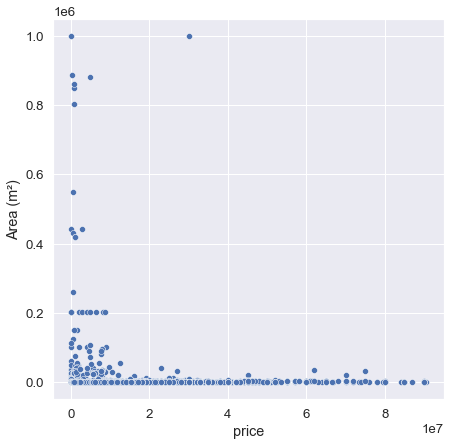

In [57]:
sns.scatterplot(x=df_totla[ "price"], y=df_totla["Area (m²)"])

<AxesSubplot:xlabel='price'>

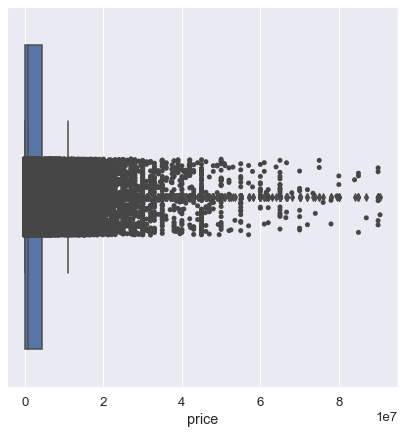

In [58]:
sns.boxplot(x='price', data=df_totla)
sns.stripplot(x='price', data=df_totla, color="#474646")

In [59]:
df_totla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68862 entries, 0 to 68861
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           68862 non-null  float64       
 1   location        68862 non-null  object        
 2   date            68862 non-null  datetime64[ns]
 3   title           68862 non-null  object        
 4   link            68862 non-null  object        
 5   viwers          68862 non-null  int32         
 6   negotiable      68862 non-null  int32         
 7   Bedrooms        68862 non-null  int64         
 8   Bathrooms       68862 non-null  int64         
 9   Area (m²)       68862 non-null  float64       
 10  Furnished       68862 non-null  object        
 11  Level           68862 non-null  object        
 12  Type            68862 non-null  object        
 13  Compound        68862 non-null  object        
 14  Amenities       68862 non-null  object        
 15  ca

In [74]:
df_totla['Bedrooms'].value_counts()

3    28967
2    11111
4     9542
5     3389
Name: Bedrooms, dtype: int64

In [42]:
# from datasist.structdata import detect_outliers
# idx = detect_outliers(df_totla, 0, ["price","Area (m²)","viwers","Bedrooms","Bathrooms","negotiable","Level"])
# len(idx)
# df_totla.drop(idx, axis=0, inplace=True)

In [72]:
idx = ["price","Area (m²)","viwers"]
outliers_indices = detect_outliers(df_totla, 0, idx)
len(outliers_indices)

7531

In [55]:
outliers_indices.remove(68863)

In [53]:
df_totla[col].iloc[outliers_indices]

IndexError: positional indexers are out-of-bounds

In [60]:
from datasist.structdata import detect_outliers
idx = ["price","Area (m²)","viwers","Bedrooms","Bathrooms","negotiable"]
for col in idx:
    outliers_indices = detect_outliers(df_totla, 0, [col])
    col_median = df_totla[col].median()
    df_totla[col].iloc[outliers_indices] = col_median

C:\Users\Moham\AppData\Local\Temp\ipykernel_22156\1835271481.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totla[col].iloc[outliers_indices] = col_median
C:\Users\Moham\AppData\Local\Temp\ipykernel_22156\1835271481.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totla[col].iloc[outliers_indices] = col_median
C:\Users\Moham\AppData\Local\Temp\ipykernel_22156\1835271481.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

<AxesSubplot:xlabel='price', ylabel='Area (m²)'>

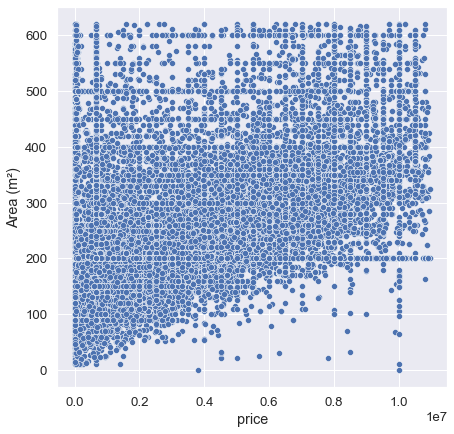

In [61]:
sns.scatterplot(x=df_totla["price"], y=df_totla["Area (m²)"])

<AxesSubplot:xlabel='price'>

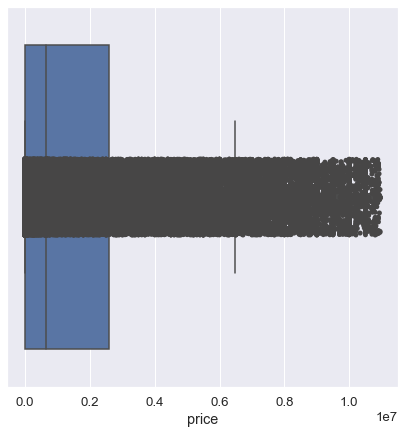

In [64]:
sns.boxplot(x='price', data=df_totla)
sns.stripplot(x='price', data=df_totla, color="#474646")

In [65]:
df_totla['Area (m²)']=df_totla['Area (m²)'].astype(int)

<AxesSubplot:xlabel='Area (m²)', ylabel='Density'>

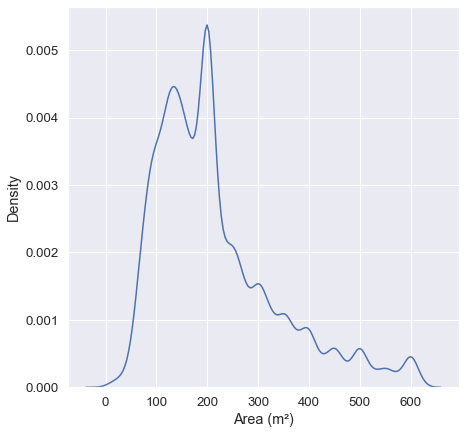

In [66]:
sns.kdeplot(data=df_totla, x="Area (m²)")

In [ ]:
len(idx)

27513

In [68]:
idx = ["price","Area (m²)","viwers","Bedrooms","Bathrooms","negotiable","Level"]
outliers_indices = detect_outliers(df_totla, 0, idx)
df_totla.drop(outliers_indices, inplace=True)


<AxesSubplot:xlabel='price'>

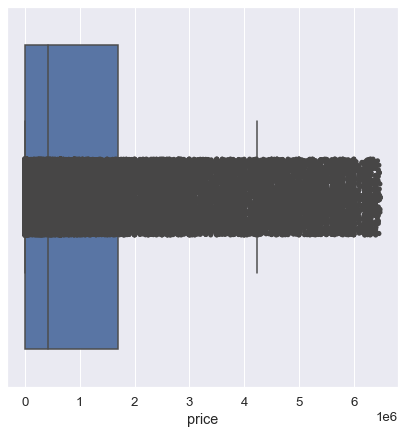

In [69]:
sns.boxplot(x='price', data=df_totla)
sns.stripplot(x='price', data=df_totla, color="#474646")

<AxesSubplot:xlabel='price', ylabel='Area (m²)'>

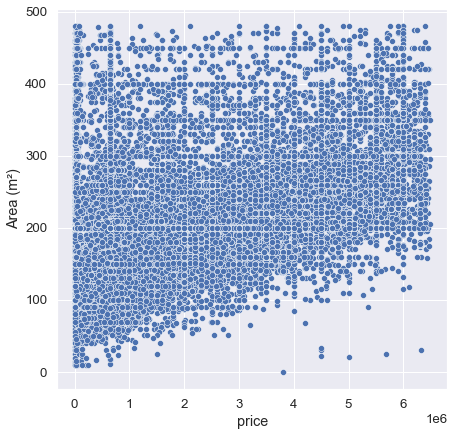

In [70]:
sns.scatterplot(x=df_totla["price"], y=df_totla["Area (m²)"])

<AxesSubplot:xlabel='Area (m²)', ylabel='Density'>

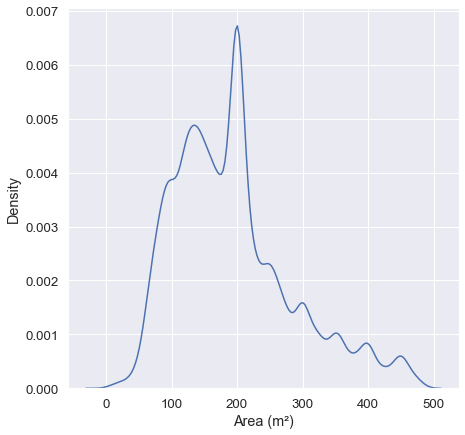

In [71]:
sns.kdeplot(data=df_totla, x="Area (m²)")